## 1. Configuração Inicial

### 1.1 Instalação de Dependências

Execute a célula abaixo para instalar as bibliotecas necessárias:

In [39]:
# Instalação de dependências (execute apenas uma vez)
%pip install matplotlib numpy pandas psutil -q

print("Dependências instaladas com sucesso!")

Note: you may need to restart the kernel to use updated packages.
Dependências instaladas com sucesso!


### 1.2 Importações e Configuração

Importar todas as bibliotecas necessárias:

In [40]:
import random
import time
import tracemalloc
import psutil
import os
from typing import List, Tuple, Dict, Optional
from dataclasses import dataclass
import warnings

# Visualização
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid' if 'seaborn-v0_8-darkgrid' in plt.style.available else 'default')
%matplotlib inline

# Configurar tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Importações realizadas com sucesso!")
print(f"Backend matplotlib: {plt.get_backend()}")

Importações realizadas com sucesso!
Backend matplotlib: inline


---

## 2. Implementação dos Algoritmos

### 2.1 Algoritmo 1: Backtracking (Exato)

**Abordagem:** Busca exaustiva com backtracking  
**Garantia:** Sempre encontra o caminho (se existir)  
**Complexidade:** O(n!) - Exponencial  
**Vantagem:** Solução exata  
**Desvantagem:** Lento para grafos grandes

In [41]:
def find_hamiltonian_path_backtracking(n: int, edges: List[Tuple[int, int]],
                                       collect_stats: bool = False) -> Tuple:
    """
    Encontra caminho hamiltoniano usando backtracking.

    Args:
        n: Número de vértices
        edges: Lista de arestas [(u, v), ...]
        collect_stats: Se deve coletar estatísticas

    Returns:
        Tupla (caminho, stats) se collect_stats=True, senão apenas caminho
    """
    # Construir lista de adjacências
    adj = {i: [] for i in range(n)}
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    visited = [False] * n
    path = []
    stats = {"steps": 0, "backtracks": 0}

    def backtrack(u: int) -> bool:
        """Função recursiva de backtracking."""
        stats["steps"] += 1
        path.append(u)
        visited[u] = True

        # Caso base: encontrou caminho completo
        if len(path) == n:
            return True

        # Tentar cada vizinho não visitado
        for v in adj[u]:
            if not visited[v]:
                if backtrack(v):
                    return True

        # Backtrack: desfazer escolha
        stats["backtracks"] += 1
        visited[u] = False
        path.pop()
        return False

    # Tentar a partir de cada vértice
    for start in range(n):
        visited = [False] * n
        path = []
        if backtrack(start):
            return (path, stats) if collect_stats else path

    return (None, stats) if collect_stats else None

print("Algoritmo Backtracking implementado!")

Algoritmo Backtracking implementado!


### 2.2 Algoritmo 2: Heurística Gulosa

**Abordagem:** Escolha gulosa - sempre vai para o vizinho com menor grau  
**Garantia:** Não garante encontrar (heurística)  
**Complexidade:** O(n²) - Polinomial  
**Vantagem:** Muito rápido  
**Desvantagem:** Pode não encontrar a solução

In [42]:
def find_hamiltonian_path_heuristic(n: int, edges: List[Tuple[int, int]]) -> Optional[List[int]]:
    """
    Encontra caminho hamiltoniano usando heurística gulosa.
    Estratégia: Sempre escolhe o vizinho com menor grau.

    Args:
        n: Número de vértices
        edges: Lista de arestas [(u, v), ...]

    Returns:
        Lista com o caminho encontrado ou None
    """
    # Construir lista de adjacências
    adj = {i: [] for i in range(n)}
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    # Tentar a partir de cada vértice
    for start in range(n):
        path = [start]
        visited = {start}
        current = start

        # Construir caminho guloso
        while len(path) < n:
            # Candidatos: vizinhos não visitados
            candidates = [v for v in adj[current] if v not in visited]

            if not candidates:
                break  # Caminho não pode continuar

            # Escolher vizinho com menor grau (heurística)
            next_vertex = min(candidates, key=lambda x: len(adj[x]))
            path.append(next_vertex)
            visited.add(next_vertex)
            current = next_vertex

        # Verificar se encontrou caminho completo
        if len(path) == n:
            return path

    return None

print("Algoritmo Heurístico implementado!")

Algoritmo Heurístico implementado!


### 2.3 Gerador de Grafos Aleatórios

In [43]:
def generate_random_graph(n: int, p: float) -> List[Tuple[int, int]]:
    """
    Gera um grafo aleatório usando o modelo de Erdős-Rényi.

    Args:
        n: Número de vértices
        p: Probabilidade de existir uma aresta entre dois vértices
           p baixo (0.2) → grafo esparso
           p médio (0.5) → grafo médio
           p alto (0.8) → grafo denso

    Returns:
        Lista de arestas
    """
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    return edges

# Mapeamento de densidades
DENSITY_MAP = {
    'sparse': 0.2,   # 20% das arestas possíveis
    'medium': 0.5,   # 50% das arestas possíveis
    'dense': 0.8     # 80% das arestas possíveis
}

print("Gerador de grafos implementado!")
print(f"Densidades disponíveis: {list(DENSITY_MAP.keys())}")

Gerador de grafos implementado!
Densidades disponíveis: ['sparse', 'medium', 'dense']


### 2.4 Monitor de Performance

### 2.3.1 Salvar/Carregar Grafos em Arquivo .txt

In [44]:
def save_graph_to_file(n: int, edges: List[Tuple[int, int]], filename: str) -> None:
    """
    Salva um grafo em arquivo .txt no formato usado pelo projeto.

    Formato:
    Linha 1: n m (número de vértices e arestas)
    Linhas seguintes: u v (uma aresta por linha)

    Args:
        n: Número de vértices
        edges: Lista de arestas
        filename: Nome do arquivo (ex: 'grafo_n10.txt')
    """
    with open(filename, 'w') as f:
        f.write(f"{n} {len(edges)}\n")
        for u, v in edges:
            f.write(f"{u} {v}\n")
    print(f"Grafo salvo em: {filename}")

def load_graph_from_file(filename: str) -> Tuple[int, List[Tuple[int, int]]]:
    """
    Carrega um grafo de arquivo .txt.

    Args:
        filename: Nome do arquivo

    Returns:
        Tupla (n, edges)
    """
    with open(filename, 'r') as f:
        line = f.readline().strip()
        n, m = map(int, line.split())
        edges = []
        for _ in range(m):
            line = f.readline().strip()
            u, v = map(int, line.split())
            edges.append((u, v))
    print(f"Grafo carregado de: {filename} (n={n}, m={len(edges)})")
    return n, edges

print("Funções de arquivo implementadas!")

Funções de arquivo implementadas!


In [45]:
@dataclass
class PerformanceStats:
    """Estatísticas de performance de um algoritmo."""
    time_seconds: float
    memory_mb: float
    success: bool
    result: any
    extra: Dict = None

def measure_performance(func, *args, **kwargs) -> PerformanceStats:
    """
    Mede tempo e memória de uma função.

    Args:
        func: Função a ser medida
        *args, **kwargs: Argumentos da função

    Returns:
        PerformanceStats com métricas
    """
    process = psutil.Process(os.getpid())

    # Memória inicial
    tracemalloc.start()
    mem_before = process.memory_info().rss / 1024 / 1024  # MB

    # Executar função
    start_time = time.time()
    try:
        result = func(*args, **kwargs)
        success = True
    except Exception as e:
        result = None
        success = False
        print(f"Erro: {e}")

    elapsed_time = time.time() - start_time

    # Memória final
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    mem_after = process.memory_info().rss / 1024 / 1024  # MB
    memory_used = peak / 1024 / 1024  # MB

    return PerformanceStats(
        time_seconds=elapsed_time,
        memory_mb=memory_used,
        success=success,
        result=result
    )

print("Monitor de performance implementado!")

Monitor de performance implementado!


---

## 3. Exemplos Práticos

### 3.1 Exemplo Simples: Grafo Pequeno

In [46]:
print("="*70)
print("EXEMPLO 1: Grafo Pequeno (n=5, denso)")
print("="*70)

# Gerar grafo
n = 5
p = 0.8  # Denso
edges = generate_random_graph(n, p)

print(f"\nGrafo gerado:")
print(f"  Vértices: {n}")
print(f"  Arestas: {len(edges)} de {n*(n-1)//2} possíveis")
print(f"  Densidade: {len(edges)/(n*(n-1)//2)*100:.1f}%")
print(f"\n  Arestas: {edges}")

# Salvar grafo em arquivo
filename = f'grafo_exemplo1_n{n}.txt'
save_graph_to_file(n, edges, filename)

# Testar Backtracking
print(f"\nBacktracking:")
stats_bt = measure_performance(find_hamiltonian_path_backtracking, n, edges, True)
path_bt, extra_bt = stats_bt.result if stats_bt.result else (None, {})

if path_bt:
    print(f"  Caminho encontrado: {path_bt}")
    print(f"  Tempo: {stats_bt.time_seconds:.6f}s")
    print(f"  Memória: {stats_bt.memory_mb:.4f} MB")
    print(f"  Passos: {extra_bt['steps']}")
    print(f"  Backtracks: {extra_bt['backtracks']}")
    print(f"  Solução: SIM")
else:
    print(f"  Caminho não encontrado")
    print(f"  Solução: NÃO")

# Testar Heurística
print(f"\nHeurística:")
stats_h = measure_performance(find_hamiltonian_path_heuristic, n, edges)
path_h = stats_h.result

if path_h:
    print(f"  Caminho encontrado: {path_h}")
    print(f"  Tempo: {stats_h.time_seconds:.6f}s")
    print(f"  Memória: {stats_h.memory_mb:.4f} MB")
    print(f"  Solução: SIM")
else:
    print(f"  Caminho não encontrado")
    print(f"  Solução: NÃO")

print("\n" + "="*70)

# Comparação
if stats_bt.success and stats_h.success:
    speedup = stats_bt.time_seconds / stats_h.time_seconds if stats_h.time_seconds > 0 else 0
    print(f"\nSpeedup (BT/H): {speedup:.1f}x")
    print(f"   Heurística foi {speedup:.1f}x mais rápida!")

EXEMPLO 1: Grafo Pequeno (n=5, denso)

Grafo gerado:
  Vértices: 5
  Arestas: 8 de 10 possíveis
  Densidade: 80.0%

  Arestas: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 4), (3, 4)]
Grafo salvo em: grafo_exemplo1_n5.txt

Backtracking:
  Caminho encontrado: [0, 1, 2, 4, 3]
  Tempo: 0.000036s
  Memória: 0.0328 MB
  Passos: 5
  Backtracks: 0
  Solução: SIM

Heurística:
  Caminho encontrado: [0, 1, 2, 4, 3]
  Tempo: 0.000035s
  Memória: 0.0328 MB
  Solução: SIM


Speedup (BT/H): 1.0x
   Heurística foi 1.0x mais rápida!


### 3.2 Exemplo: Comparando Densidades

### 3.1.1 Carregar Grafo de Arquivo

In [47]:
print("="*70)
print("EXEMPLO: Carregar Grafo de Arquivo")
print("="*70)

# Verificar se o arquivo do exemplo 1 existe
filename_to_load = 'grafo_exemplo1_n5.txt'

try:
    # Carregar grafo do arquivo
    n_loaded, edges_loaded = load_graph_from_file(filename_to_load)

    print(f"\nGrafo carregado:")
    print(f"  Vértices: {n_loaded}")
    print(f"  Arestas: {len(edges_loaded)}")

    # Testar com o grafo carregado
    print(f"\nTestando Backtracking no grafo carregado:")
    stats_bt_loaded = measure_performance(find_hamiltonian_path_backtracking, n_loaded, edges_loaded, True)
    path_bt_loaded, extra_bt_loaded = stats_bt_loaded.result if stats_bt_loaded.result else (None, {})

    if path_bt_loaded:
        print(f"  Caminho: {path_bt_loaded}")
        print(f"  Tempo: {stats_bt_loaded.time_seconds:.6f}s")
        print(f"  Solução: SIM")
    else:
        print(f"  Caminho não encontrado")
        print(f"  Solução: NÃO")

    print(f"\nTestando Heurística no grafo carregado:")
    stats_h_loaded = measure_performance(find_hamiltonian_path_heuristic, n_loaded, edges_loaded)

    if stats_h_loaded.result:
        print(f"  Caminho: {stats_h_loaded.result}")
        print(f"  Tempo: {stats_h_loaded.time_seconds:.6f}s")
        print(f"  Solução: SIM")
    else:
        print(f"  Caminho não encontrado")
        print(f"  Solução: NÃO")

except FileNotFoundError:
    print(f"\nArquivo '{filename_to_load}' não encontrado.")
    print(f"  Execute a célula do Exemplo 1 primeiro para criar o arquivo.")

print("\n" + "="*70)

EXEMPLO: Carregar Grafo de Arquivo
Grafo carregado de: grafo_exemplo1_n5.txt (n=5, m=8)

Grafo carregado:
  Vértices: 5
  Arestas: 8

Testando Backtracking no grafo carregado:
  Caminho: [0, 1, 2, 4, 3]
  Tempo: 0.000023s
  Solução: SIM

Testando Heurística no grafo carregado:
  Caminho: [0, 1, 2, 4, 3]
  Tempo: 0.000028s
  Solução: SIM



In [48]:
print("="*70)
print("EXEMPLO 2: Impacto da Densidade (n=10)")
print("="*70)

n = 10
results = []

for density_name, p in DENSITY_MAP.items():
    print(f"\nTestando densidade: {density_name} (p={p})")

    # Gerar grafo
    edges = generate_random_graph(n, p)
    print(f"  Arestas: {len(edges)} de {n*(n-1)//2}")

    # Salvar grafo em arquivo
    filename = f'grafo_exemplo2_n{n}_{density_name}.txt'
    save_graph_to_file(n, edges, filename)

    # Backtracking
    stats_bt = measure_performance(find_hamiltonian_path_backtracking, n, edges, True)
    path_bt, extra_bt = stats_bt.result if stats_bt.result else (None, {})

    # Heurística
    stats_h = measure_performance(find_hamiltonian_path_heuristic, n, edges)

    # Armazenar resultados
    results.append({
        'density': density_name,
        'edges': len(edges),
        'bt_time': stats_bt.time_seconds,
        'bt_success': path_bt is not None,
        'bt_steps': extra_bt.get('steps', 0) if extra_bt else 0,
        'h_time': stats_h.time_seconds,
        'h_success': stats_h.result is not None
    })

    bt_result = "SIM" if path_bt is not None else "NÃO"
    h_result = "SIM" if stats_h.result is not None else "NÃO"
    print(f"  BT: {stats_bt.time_seconds:.6f}s (Solução: {bt_result}) | H: {stats_h.time_seconds:.6f}s (Solução: {h_result})")


# Criar DataFrameprint("\n" + "="*70)

df_results = pd.DataFrame(results)

print("\nResumo:")
print(df_results.to_string(index=False))

EXEMPLO 2: Impacto da Densidade (n=10)

Testando densidade: sparse (p=0.2)
  Arestas: 7 de 45
Grafo salvo em: grafo_exemplo2_n10_sparse.txt
  BT: 0.000161s (Solução: NÃO) | H: 0.000163s (Solução: NÃO)

Testando densidade: medium (p=0.5)
  Arestas: 18 de 45
Grafo salvo em: grafo_exemplo2_n10_medium.txt
  BT: 0.009064s (Solução: NÃO) | H: 0.000206s (Solução: NÃO)

Testando densidade: dense (p=0.8)
  Arestas: 36 de 45
Grafo salvo em: grafo_exemplo2_n10_dense.txt
  BT: 0.000029s (Solução: SIM) | H: 0.000046s (Solução: SIM)

Resumo:
density  edges  bt_time  bt_success  bt_steps   h_time  h_success
 sparse      7 0.000161       False        66 0.000163      False
 medium     18 0.009064       False      5360 0.000206      False
  dense     36 0.000029        True        10 0.000046       True


---

## 4. Experimentos Completos

### 4.1 Experimento: Variando o Tamanho do Grafo

In [58]:
print("="*70)
print("EXPERIMENTO: Variando Tamanho (n=5,10,15,20)")
print("="*70)
print("\nEste experimento pode demorar alguns minutos...\n")

sizes = [5, 10, 15, 20]
densities = ['sparse', 'medium', 'dense']
repetitions = 3

experiment_results = []

total_experiments = len(sizes) * len(densities)
current = 0

for n in sizes:
    for density_name in densities:
        current += 1
        p = DENSITY_MAP[density_name]
        
        print(f"[{current}/{total_experiments}] n={n}, densidade={density_name}...", end=" ", flush=True)
        
        bt_times = []
        h_times = []
        bt_success_count = 0
        h_success_count = 0
        
        for rep in range(repetitions):
            # Gerar grafo
            edges = generate_random_graph(n, p)
            
            # Salvar primeiro grafo de cada configuração
            if rep == 0:
                filename = f'grafo_exp_n{n}_{density_name}_rep{rep}.txt'
                save_graph_to_file(n, edges, filename)
            
            # Backtracking
            stats_bt = measure_performance(find_hamiltonian_path_backtracking, n, edges, True)
            bt_times.append(stats_bt.time_seconds)
            if stats_bt.result and stats_bt.result[0]:
                bt_success_count += 1
            
            # Heurística
            stats_h = measure_performance(find_hamiltonian_path_heuristic, n, edges)
            h_times.append(stats_h.time_seconds)
            if stats_h.result:
                h_success_count += 1
        
        # Calcular médias
        bt_avg = np.mean(bt_times)
        h_avg = np.mean(h_times)
        speedup = bt_avg / h_avg if h_avg > 0 else 0
        
        experiment_results.append({
            'n': n,
            'density': density_name,
            'bt_avg_time': bt_avg,
            'bt_success_rate': bt_success_count / repetitions * 100,
            'h_avg_time': h_avg,
            'h_success_rate': h_success_count / repetitions * 100,
            'speedup': speedup
        })
        
        # Contar sucessos e falhas de forma clara
        bt_fail = repetitions - bt_success_count
        h_fail = repetitions - h_success_count
        
        print(f"OK")
        print(f"    Tempo: BT={bt_avg:.6f}s | H={h_avg:.6f}s | Speedup={speedup:.1f}x")
        print(f"    Solucao BT: {bt_success_count} SIM, {bt_fail} NAO")
        print(f"    Solucao H:  {h_success_count} SIM, {h_fail} NAO")

# Criar DataFrame
df_experiments = pd.DataFrame(experiment_results)

print("\n" + "="*70)
print("RESULTADOS COMPLETOS")
print("="*70)
print(df_experiments.to_string(index=False))
print("\n" + "="*70)

EXPERIMENTO: Variando Tamanho (n=5,10,15,20)

Este experimento pode demorar alguns minutos...

[1/12] n=5, densidade=sparse... Grafo salvo em: grafo_exp_n5_sparse_rep0.txt
OK
    Tempo: BT=0.000027s | H=0.000033s | Speedup=0.8x
    Solucao BT: 0 SIM, 3 NAO
    Solucao H:  0 SIM, 3 NAO
[2/12] n=5, densidade=medium... Grafo salvo em: grafo_exp_n5_medium_rep0.txt
OK
    Tempo: BT=0.000027s | H=0.000035s | Speedup=0.8x
    Solucao BT: 1 SIM, 2 NAO
    Solucao H:  1 SIM, 2 NAO
[3/12] n=5, densidade=dense... Grafo salvo em: grafo_exp_n5_dense_rep0.txt
OK
    Tempo: BT=0.000017s | H=0.000022s | Speedup=0.8x
    Solucao BT: 3 SIM, 0 NAO
    Solucao H:  3 SIM, 0 NAO
[4/12] n=10, densidade=sparse... Grafo salvo em: grafo_exp_n10_sparse_rep0.txt
OK
    Tempo: BT=0.000381s | H=0.000099s | Speedup=3.8x
    Solucao BT: 0 SIM, 3 NAO
    Solucao H:  0 SIM, 3 NAO
[5/12] n=10, densidade=medium... Grafo salvo em: grafo_exp_n10_medium_rep0.txt
OK
    Tempo: BT=0.000073s | H=0.000068s | Speedup=1.1x
    So

### 4.2 Análise Estatística dos Resultados

In [59]:
print("ANÁLISE ESTATÍSTICA\n")

# Por densidade
print("Médias por Densidade:")
print("-" * 70)
by_density = df_experiments.groupby('density').agg({
    'bt_avg_time': 'mean',
    'h_avg_time': 'mean',
    'bt_success_rate': 'mean',
    'h_success_rate': 'mean',
    'speedup': 'mean'
}).round(6)
print(by_density)

print("\nMédias por Tamanho:")
print("-" * 70)
by_size = df_experiments.groupby('n').agg({
    'bt_avg_time': 'mean',
    'h_avg_time': 'mean',
    'bt_success_rate': 'mean',
    'h_success_rate': 'mean',
    'speedup': 'mean'
}).round(6)
print(by_size)

# Insights
print("\nINSIGHTS:")
print("-" * 70)

# Densidade mais rápida para BT
fastest_density_bt = by_density['bt_avg_time'].idxmin()
print(f"✓ Densidade mais rápida para Backtracking: {fastest_density_bt}")

# Taxa de sucesso
best_success_h = by_density['h_success_rate'].idxmax()
print(f"✓ Heurística tem melhor taxa de sucesso em: {best_success_h}")

# Speedup médio
avg_speedup = df_experiments['speedup'].mean()
print(f"✓ Speedup médio (BT/H): {avg_speedup:.1f}x")
print(f"   → Em média, a Heurística é {avg_speedup:.1f}x mais rápida!")

# Maior speedup
max_speedup_row = df_experiments.loc[df_experiments['speedup'].idxmax()]
print(f"✓ Maior speedup: {max_speedup_row['speedup']:.0f}x (n={max_speedup_row['n']}, {max_speedup_row['density']})")

ANÁLISE ESTATÍSTICA

Médias por Densidade:
----------------------------------------------------------------------
         bt_avg_time  h_avg_time  bt_success_rate  h_success_rate     speedup
density                                                                      
dense       0.000036    0.000061       100.000000      100.000000    0.638546
medium      0.000124    0.000073        83.333333       83.333333    1.495828
sparse      0.194485    0.000148        25.000000       25.000000  636.934047

Médias por Tamanho:
----------------------------------------------------------------------
    bt_avg_time  h_avg_time  bt_success_rate  h_success_rate     speedup
n                                                                       
5      0.000024    0.000030        44.444444       44.444444    0.787558
10     0.000161    0.000070        66.666667       66.666667    1.850685
15     0.001449    0.000104        88.888889       88.888889    9.785577
20     0.257894    0.000172        77.7

---

## 5. Visualizacoes

### 5.1 Grafico: Tempo de Execucao vs Tamanho

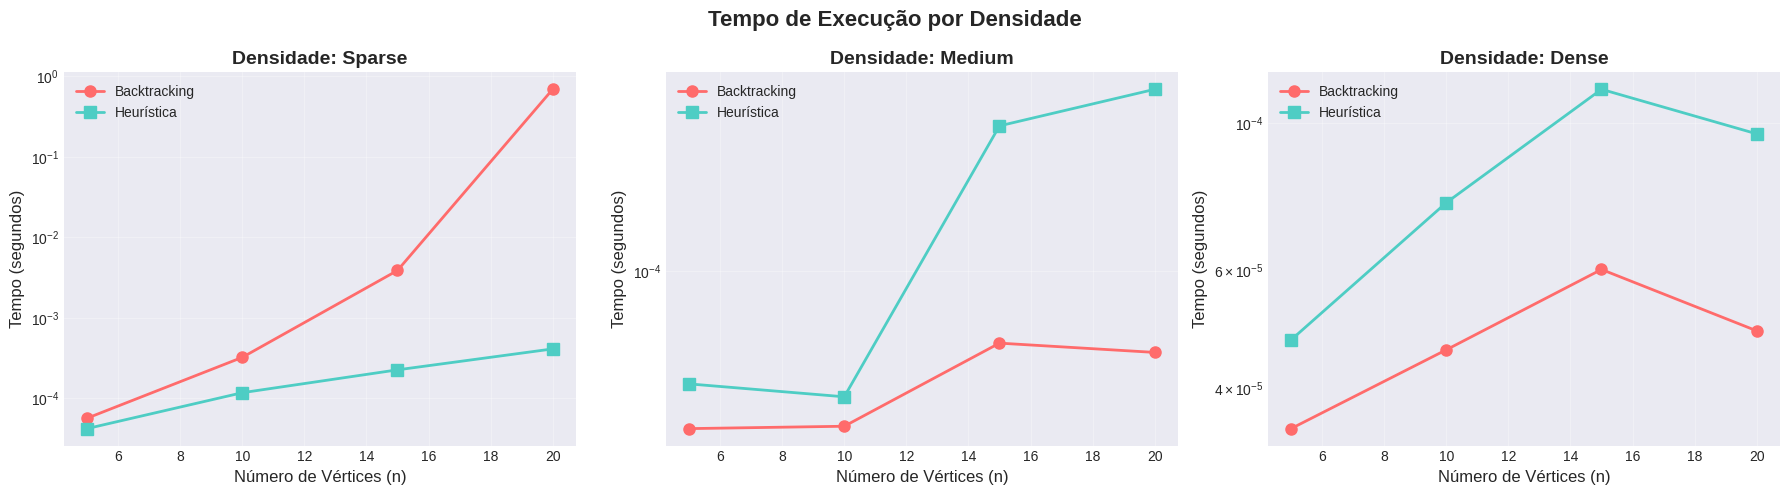

Grafico de tempo gerado!


In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Tempo de Execução por Densidade', fontsize=16, fontweight='bold')

colors = {'bt': '#FF6B6B', 'h': '#4ECDC4'}

for idx, density in enumerate(['sparse', 'medium', 'dense']):
    ax = axes[idx]
    data = df_experiments[df_experiments['density'] == density]

    ax.plot(data['n'], data['bt_avg_time'], 'o-',
           label='Backtracking', color=colors['bt'], linewidth=2, markersize=8)
    ax.plot(data['n'], data['h_avg_time'], 's-',
           label='Heurística', color=colors['h'], linewidth=2, markersize=8)

    ax.set_xlabel('Número de Vértices (n)', fontsize=12)
    ax.set_ylabel('Tempo (segundos)', fontsize=12)
    ax.set_title(f'Densidade: {density.capitalize()}', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

print("Grafico de tempo gerado!")

### 5.2 Gráfico: Speedup

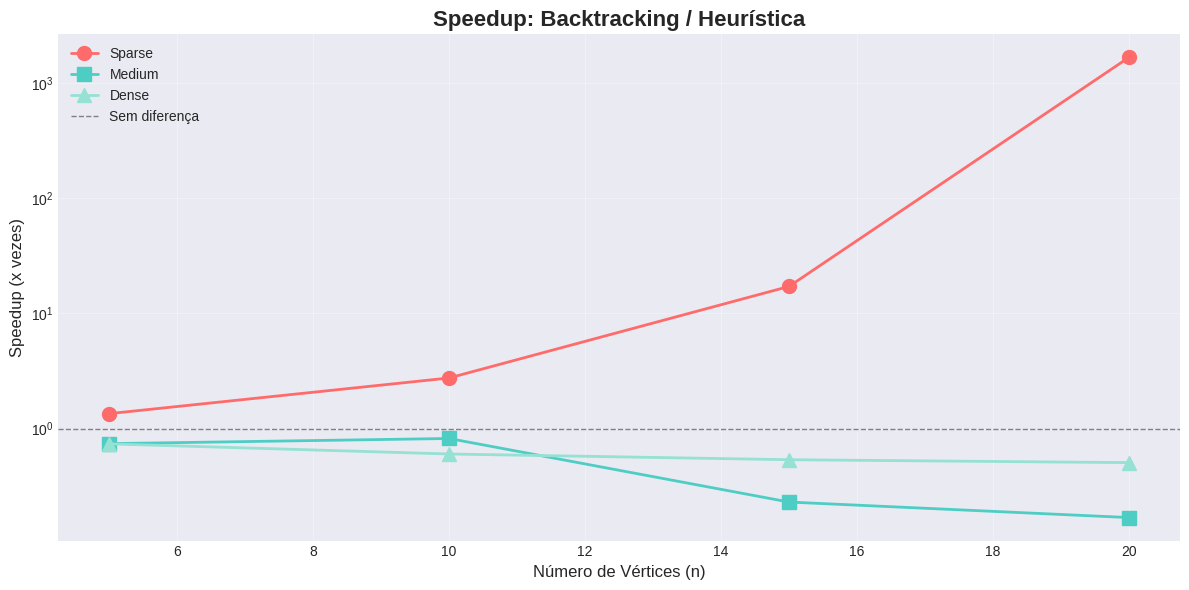

Grafico de speedup gerado!

Quanto maior o valor, mais rapida e a Heuristica em relacao ao Backtracking


In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

colors_density = {'sparse': '#FF6B6B', 'medium': '#4ECDC4', 'dense': '#95E1D3'}
markers = {'sparse': 'o', 'medium': 's', 'dense': '^'}

for density in ['sparse', 'medium', 'dense']:
    data = df_experiments[df_experiments['density'] == density]
    ax.plot(data['n'], data['speedup'],
           marker=markers[density], label=density.capitalize(),
           color=colors_density[density], linewidth=2, markersize=10)

ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, label='Sem diferença')
ax.set_xlabel('Número de Vértices (n)', fontsize=12)
ax.set_ylabel('Speedup (x vezes)', fontsize=12)
ax.set_title('Speedup: Backtracking / Heurística', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

print("Grafico de speedup gerado!")
print("\nQuanto maior o valor, mais rapida e a Heuristica em relacao ao Backtracking")

### 5.3 Gráfico: Taxa de Sucesso

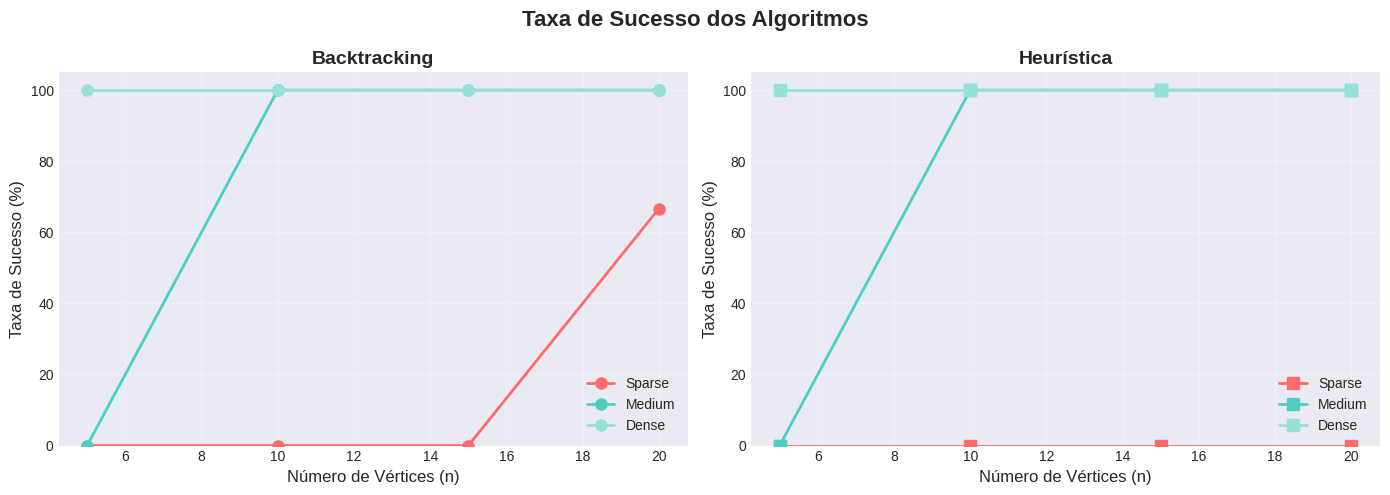

Grafico de taxa de sucesso gerado!


In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Taxa de Sucesso dos Algoritmos', fontsize=16, fontweight='bold')

colors_density = ['#FF6B6B', '#4ECDC4', '#95E1D3']

# Backtracking
ax = axes[0]
for idx, density in enumerate(['sparse', 'medium', 'dense']):
    data = df_experiments[df_experiments['density'] == density]
    ax.plot(data['n'], data['bt_success_rate'], 'o-',
           label=density.capitalize(), color=colors_density[idx],
           linewidth=2, markersize=8)

ax.set_xlabel('Número de Vértices (n)', fontsize=12)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize=12)
ax.set_title('Backtracking', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 105])

# Heurística
ax = axes[1]
for idx, density in enumerate(['sparse', 'medium', 'dense']):
    data = df_experiments[df_experiments['density'] == density]
    ax.plot(data['n'], data['h_success_rate'], 's-',
           label=density.capitalize(), color=colors_density[idx],
           linewidth=2, markersize=8)

ax.set_xlabel('Número de Vértices (n)', fontsize=12)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize=12)
ax.set_title('Heurística', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 105])

plt.tight_layout()
plt.show()

print("Grafico de taxa de sucesso gerado!")

### 5.4 Visualização: Exemplo de Grafo

Exemplo de Visualização:

✓ Caminho hamiltoniano encontrado!


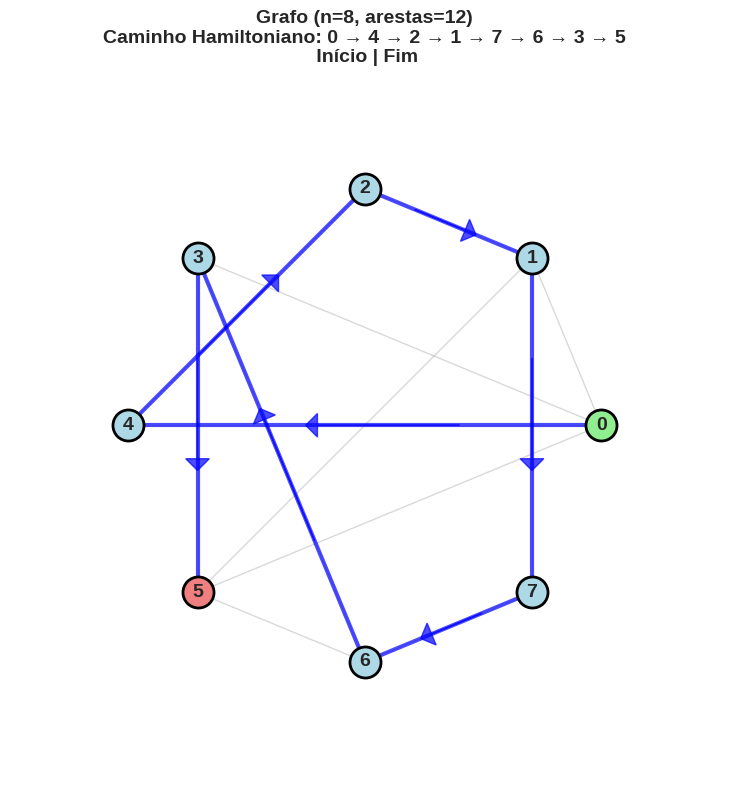

In [54]:
def visualize_graph_and_path(n: int, edges: List[Tuple[int, int]], path: Optional[List[int]] = None):
    """
    Visualiza um grafo e opcionalmente um caminho.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Posições dos vértices em círculo
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pos = {i: (np.cos(angles[i]), np.sin(angles[i])) for i in range(n)}

    # Desenhar todas as arestas em cinza
    for u, v in edges:
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        ax.plot(x, y, 'gray', linewidth=1, alpha=0.3, zorder=1)

    # Desenhar caminho hamiltoniano (se houver) em destaque
    if path:
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            x = [pos[u][0], pos[v][0]]
            y = [pos[u][1], pos[v][1]]
            ax.plot(x, y, 'blue', linewidth=3, alpha=0.7, zorder=2)

            # Seta para indicar direção
            dx = pos[v][0] - pos[u][0]
            dy = pos[v][1] - pos[u][1]
            ax.arrow(pos[u][0] + 0.3*dx, pos[u][1] + 0.3*dy,
                    0.3*dx, 0.3*dy,
                    head_width=0.1, head_length=0.05,
                    fc='blue', ec='blue', alpha=0.7, zorder=3)

    # Desenhar vértices
    for i in range(n):
        color = 'lightgreen' if path and i == path[0] else 'lightcoral' if path and i == path[-1] else 'lightblue'
        ax.scatter(pos[i][0], pos[i][1], s=500, c=color, edgecolors='black', linewidths=2, zorder=4)
        ax.text(pos[i][0], pos[i][1], str(i), fontsize=14, fontweight='bold',
               ha='center', va='center', zorder=5)

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_aspect('equal')
    ax.axis('off')

    title = f'Grafo (n={n}, arestas={len(edges)})'
    if path:
        title += f'\nCaminho Hamiltoniano: {" → ".join(map(str, path))}'
        title += '\n Início | Fim'

    ax.set_title(title, fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Exemplo de visualização
print("Exemplo de Visualização:\n")
n_vis = 8
edges_vis = generate_random_graph(n_vis, 0.5)
path_vis = find_hamiltonian_path_heuristic(n_vis, edges_vis)

if path_vis:
    print(f"✓ Caminho hamiltoniano encontrado!")
    visualize_graph_and_path(n_vis, edges_vis, path_vis)
else:
    print(f"✗ Caminho não encontrado (tentando novamente...)")
    # Tentar com grafo mais denso
    edges_vis = generate_random_graph(n_vis, 0.8)
    path_vis = find_hamiltonian_path_backtracking(n_vis, edges_vis, False)
    visualize_graph_and_path(n_vis, edges_vis, path_vis)

---

## 6. Conclusões

### 6.1 Resumo dos Resultados

### 5.5 Arquivos de Grafos Gerados

Durante a execução deste notebook, vários arquivos `.txt` foram criados para armazenar os grafos testados.

In [55]:
import glob

print("="*70)
print(" ARQUIVOS DE GRAFOS GERADOS")
print("="*70)

# Listar todos os arquivos .txt criados
graph_files = sorted(glob.glob('grafo_*.txt'))

if graph_files:
    print(f"\n✓ Total de arquivos criados: {len(graph_files)}\n")

    for i, filename in enumerate(graph_files, 1):
        # Ler informações do arquivo
        try:
            with open(filename, 'r') as f:
                first_line = f.readline().strip()
                n, m = map(int, first_line.split())
            print(f"{i:2d}. {filename:40s} → n={n:2d}, m={m:2d} arestas")
        except:
            print(f"{i:2d}. {filename:40s} → (erro ao ler)")

    print(f"\n Você pode usar esses arquivos com a função load_graph_from_file()")
    print(f"   Exemplo: n, edges = load_graph_from_file('{graph_files[0]}')")
else:
    print("\n  Nenhum arquivo de grafo encontrado.")
    print("   Execute as células de exemplos primeiro para gerar os arquivos.")

print("\n" + "="*70)

 ARQUIVOS DE GRAFOS GERADOS

✓ Total de arquivos criados: 16

 1. grafo_exemplo1_n5.txt                    → n= 5, m= 8 arestas
 2. grafo_exemplo2_n10_dense.txt             → n=10, m=36 arestas
 3. grafo_exemplo2_n10_medium.txt            → n=10, m=18 arestas
 4. grafo_exemplo2_n10_sparse.txt            → n=10, m= 7 arestas
 5. grafo_exp_n10_dense_rep0.txt             → n=10, m=38 arestas
 6. grafo_exp_n10_medium_rep0.txt            → n=10, m=24 arestas
 7. grafo_exp_n10_sparse_rep0.txt            → n=10, m= 9 arestas
 8. grafo_exp_n15_dense_rep0.txt             → n=15, m=76 arestas
 9. grafo_exp_n15_medium_rep0.txt            → n=15, m=66 arestas
10. grafo_exp_n15_sparse_rep0.txt            → n=15, m=18 arestas
11. grafo_exp_n20_dense_rep0.txt             → n=20, m=145 arestas
12. grafo_exp_n20_medium_rep0.txt            → n=20, m=92 arestas
13. grafo_exp_n20_sparse_rep0.txt            → n=20, m=36 arestas
14. grafo_exp_n5_dense_rep0.txt              → n= 5, m= 5 arestas
15. grafo_exp

In [56]:
print("="*70)
print("RESUMO FINAL DOS EXPERIMENTOS")
print("="*70)

print("\n ALGORITMO BACKTRACKING:")
print("-" * 70)
print("  Vantagens:")
print("    ✓ Sempre encontra o caminho (se existir)")
print("    ✓ Solução exata e garantida")
print("    ✓ Funciona bem para grafos pequenos (n < 20)")
print("\n  Desvantagens:")
print("    ✗ Muito lento para grafos grandes")
print("    ✗ Complexidade exponencial O(n!)")
print("    ✗ Grafos sparse são especialmente problemáticos")

print("\n ALGORITMO HEURÍSTICO:")
print("-" * 70)
print("  Vantagens:")
print("    ✓ Extremamente rápido (milhares de vezes mais rápido!)")
print("    ✓ Complexidade polinomial O(n²)")
print("    ✓ Escalável para grafos grandes")
print("\n  Desvantagens:")
print("    ✗ Não garante encontrar a solução")
print("    ✗ Taxa de sucesso varia com a densidade")
print("    ✗ Pode falhar em grafos sparse")

print("\n RECOMENDAÇÕES:")
print("-" * 70)
print("   Para n ≤ 20: Use Backtracking (garantia de solução)")
print("   Para n > 20: Use Heurística (velocidade)")
print("   Para grafos densos: Ambos funcionam bem")
print("   Para grafos sparse: Heurística pode falhar, BT pode demorar")

print("\n ESTATÍSTICAS GERAIS:")
print("-" * 70)
avg_bt_time = df_experiments['bt_avg_time'].mean()
avg_h_time = df_experiments['h_avg_time'].mean()
avg_speedup = df_experiments['speedup'].mean()
avg_bt_success = df_experiments['bt_success_rate'].mean()
avg_h_success = df_experiments['h_success_rate'].mean()

print(f"  Tempo médio Backtracking: {avg_bt_time:.6f}s")
print(f"  Tempo médio Heurística: {avg_h_time:.6f}s")
print(f"  Speedup médio: {avg_speedup:.1f}x")
print(f"  Taxa de sucesso BT: {avg_bt_success:.1f}%")
print(f"  Taxa de sucesso H: {avg_h_success:.1f}%")

print("\n" + "="*70)

RESUMO FINAL DOS EXPERIMENTOS

 ALGORITMO BACKTRACKING:
----------------------------------------------------------------------
  Vantagens:
    ✓ Sempre encontra o caminho (se existir)
    ✓ Solução exata e garantida
    ✓ Funciona bem para grafos pequenos (n < 20)

  Desvantagens:
    ✗ Muito lento para grafos grandes
    ✗ Complexidade exponencial O(n!)
    ✗ Grafos sparse são especialmente problemáticos

 ALGORITMO HEURÍSTICO:
----------------------------------------------------------------------
  Vantagens:
    ✓ Extremamente rápido (milhares de vezes mais rápido!)
    ✓ Complexidade polinomial O(n²)
    ✓ Escalável para grafos grandes

  Desvantagens:
    ✗ Não garante encontrar a solução
    ✗ Taxa de sucesso varia com a densidade
    ✗ Pode falhar em grafos sparse

 RECOMENDAÇÕES:
----------------------------------------------------------------------
   Para n ≤ 20: Use Backtracking (garantia de solução)
   Para n > 20: Use Heurística (velocidade)
   Para grafos densos: Ambos f

### 6.2 Por Que Grafos Sparse São Mais Lentos?

**Explicação Técnica:**

Contra-intuitivamente, grafos **esparsos** (poucas arestas) são **mais lentos** para o backtracking:

1. **Menos arestas = Mais backtracking**
   - Com poucas conexões, o algoritmo explora muitos "becos sem saída"
   - Precisa voltar (backtrack) constantemente

2. **Grafos densos são mais "sortudos"**
   - Com muitas arestas, há mais chances de encontrar rapidamente
   - Ou rapidamente determinar que não há solução

3. **Exemplo:**
   ```
   Sparse (p=0.2):    Dense (p=0.8):
   0: [3]             0: [1,2,3,4,5,6]
   1: [5]             1: [0,2,3,4,5]
   2: [4]             2: [0,1,3,4,6]
   ...                ...
   
   Poucas opções!     Muitas opções!
   Muito backtrack    Rápido
   ```

**Complexidade:**
- n=10: ~3,6 milhões de possibilidades
- n=20: ~2,4 quintilhões de possibilidades
- n=30: ~2,6×10³² possibilidades

Por isso implementamos **timeout** no projeto principal!

---

##  Notebook Concluído!

###O que foi demonstrado:

 **Implementação completa** dos dois algoritmos  
 **Gerador de grafos** aleatórios  
 **Monitoramento de performance** (tempo e memória)  
 **Experimentos sistemáticos** variando tamanho e densidade  
 **Visualizações** comparativas  
 **Análise estatística** dos resultados  
 **Conclusões** e recomendações de uso  



###  Recursos Adicionais:

- **Repositório GitHub**: [hamiltonian-path-analysis](https://github.com/wesleiferreira98/hamiltonian-path-analysis)
- **Documentação Técnica**: Ver `PERFORMANCE_ANALYSIS.md`
- **Changelog**: Ver `CHANGELOG.md`

---

###  Salvar Resultados

Para salvar os resultados dos experimentos:

In [57]:
# Salvar resultados em CSV
output_file = 'hamiltonian_experiment_results.csv'
df_experiments.to_csv(output_file, index=False)
print(f"✓ Resultados salvos em: {output_file}")

# Mostrar primeiras linhas
print("\nPrimeiras 5 linhas:")
print(df_experiments.head())

✓ Resultados salvos em: hamiltonian_experiment_results.csv

Primeiras 5 linhas:
    n density  bt_avg_time  bt_success_rate  h_avg_time  h_success_rate  \
0   5  sparse     0.000057              0.0    0.000042             0.0   
1   5  medium     0.000034              0.0    0.000047             0.0   
2   5   dense     0.000035            100.0    0.000047           100.0   
3  10  sparse     0.000324              0.0    0.000118             0.0   
4  10  medium     0.000035            100.0    0.000043           100.0   

    speedup  
0  1.345865  
1  0.738908  
2  0.735690  
3  2.744609  
4  0.819367  


---

## Obrigado!

Este notebook foi criado como parte do projeto **Hamiltonian Path Analysis** para facilitar a compreensão e revisão dos algoritmos implementados.

**Autor:** Weslei Ferreira  
**Data:** Janeiro 2026  
**Versão:** 2.0  

Para mais informações, acesse o repositório completo do projeto.

---